In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

In [16]:
df = pd.read_csv("D:\PROGRAMMING\DATASETS\Student_Performance.csv")
print(df.shape[0])
df.head()

10000


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


In [3]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].replace({'Yes':1, 'No':0})
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66


In [4]:
## Dependent Independent Variables
X = df.iloc[:, :-1]
y = df[['Performance Index']]

In [5]:
## Significance level checking
alpha = 0.05

# X = sm.add_constant(X)
est = sm.OLS(y, X)
res = est.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:      Performance Index   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          1.991e+05
Date:                Tue, 19 Sep 2023   Prob (F-statistic):                        0.00
Time:                        19:16:37   Log-Likelihood:                         -31819.
No. Observations:               10000   AIC:                                  6.365e+04
Df Residuals:                    9995   BIC:                                  6.368e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [6]:
## Check the coefficients
print(res.params)

Hours Studied                       2.195984
Previous Scores                     0.817220
Extracurricular Activities         -1.170875
Sleep Hours                        -1.503601
Sample Question Papers Practiced   -0.265649
dtype: float64


In [7]:
## Check the p values
print(res.pvalues)

Hours Studied                       0.000000e+00
Previous Scores                     0.000000e+00
Extracurricular Activities          3.495568e-24
Sleep Hours                         0.000000e+00
Sample Question Papers Practiced    6.544338e-41
dtype: float64


In [8]:
## Check for the confidence interval
print(res.conf_int())

                                         0         1
Hours Studied                     2.154021  2.237948
Previous Scores                   0.812147  0.822292
Extracurricular Activities       -1.396527 -0.945223
Sleep Hours                      -1.556728 -1.450475
Sample Question Papers Practiced -0.304350 -0.226947


In [9]:
## Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 5)
(2000, 5)
(8000, 1)
(2000, 1)


In [10]:
# Train-Test Split Sample Size
train_sample_size = X_train.shape[0]
test_sample_size = X_test.shape[0]
total_sample_size = train_sample_size + test_sample_size
print("Total Sample Size:", total_sample_size)

# Original Dataset Sample Size
original_dataset_sample_size = df.shape[0]
print("Original Dataset Sample Size:", original_dataset_sample_size)

Total Sample Size: 10000
Original Dataset Sample Size: 10000


In [11]:
## Train Our Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)

In [12]:
final = pd.DataFrame(np.c_[y_test, y_predict], columns = ['Actual', 'Predicted'])
final.head()

,Actual,Predicted
0,38.0,41.479030
1,27.0,26.803561
2,30.0,34.253965
3,49.0,48.256838
4,39.0,39.568253


<Axes: xlabel='Actual', ylabel='Predicted'>

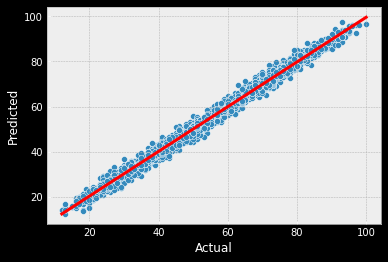

In [13]:
plt.style.use('bmh')
sb.scatterplot(data = final, x = 'Actual', y = 'Predicted')
sb.regplot(data = final, x = 'Actual', y = 'Predicted', scatter=False, color = 'red')

In [14]:
print("The accuracy score is ", lr.score(X_test, y_test))
print("R^2 is : ", r2_score(y_test, y_predict))
print("Mean Absolute Error is : ", mean_absolute_error(y_test, y_predict))
print("Mean Squared Error is  : ", mean_squared_error(y_test, y_predict))
print("Root Mean Squared Error is  : ", np.sqrt(mean_squared_error(y_test, y_predict)))

The accuracy score is  0.9886543202866286
R^2 is :  0.9886543202866286
Mean Absolute Error is :  1.6412162371989103
Mean Squared Error is  :  4.236045598233288
Root Mean Squared Error is  :  2.0581655905765426


In [15]:
data = {
    'Hours Studied': [6],
    'Previous Scores': [60],
    'Extracurricular Activities' : [1],
    'Sleep Hours': [9],
    'Sample Question Papers Practiced' : [10]
}
new_data = pd.DataFrame(data)
predicted_result = lr.predict(new_data)
print(predicted_result[0].round(2))

[51.03]


In [ ]:
X_train.info()